<a href="https://colab.research.google.com/github/harim061/CNN/blob/main/CNN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolution Layers
- Conv1d : text
- Conv2d : image

## Parameters
Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')

## Input Tensor (N, Cin, Hin, Win)

- N : batch의 크기
- Cin : in_channels에 넣은 값
- H : 2D Input Tensor 높이
- W : 2D input Tensor 너비



## Output Tensor (N, Cin, Hin, Win)

- N : batch의 크기
- Cin : out_channels에 넣은 값 (필터의 수)
- H :⌊
stride[0]
H
in
​
 +2×padding[0]−dilation[0]×(kernel_size[0]−1)−1
​
 +1⌋
- W :⌊
stride[1]
W
in
​
 +2×padding[1]−dilation[1]×(kernel_size[1]−1)−1
​
 +1⌋


In [1]:
import torch

import torch.nn as nn

import torch.optim as optim

import torch.nn.init as init

import matplotlib.pyplot as plt

import torchvision.datasets as dset

import torchvision.transforms as transforms

from torch.utils.data import DataLoader


- batch_size : 한번에 학습하는 이미지의 수
- MNIST는 6만장의 데이터가 존재 -> 256개씩 묶어서 진행하겠다

In [2]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [3]:
#torchvision.datasets라이브러리에서 MNIST데이터를 받아오는 코드
mnist_train = dset.MNIST("./",train=True, transform = transforms.ToTensor(),target_transform=None, download = True)

mnist_test = dset.MNIST("./", train=False, transform = transforms.ToTensor(), target_transform=None, download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 89391868.85it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 121500194.41it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25485005.39it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 1307696.92it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
# 받아온 데이터를 학습하기 위해 나누기
# shuffle : 데이터를 무작위로 섞을 때
# drop_last : 묶고 남은 자투리 데이터들은 버릴지 말지
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=2,drop_last=True)

test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=2,drop_last=True)

In [21]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__() # Super class로 클래스를 초기화

    self.layer = nn.Sequential( # Sequential : 여러 계층을 순차적으로 담을 수 있는 컨테이너
        # img shape (256,28,28,1)
        nn.Conv2d(1,16,5), # 입력 채널 :1 / 출력 채널 : 16 = 필터 수 / 필터의 크기 = 5 (5x5)
        # img shape (256,24,24,16)
        nn.ReLU(),
        nn.Conv2d(16,32,5),
        # img shape (256,20,20,32)
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        # img shape (256,10,10,32)
        nn.Conv2d(32,64,5),
        # img shape (256,6,6,64)
        nn.ReLU(),
        nn.MaxPool2d(2,2),
        # img shape (256,3,3,64)
    )

    # CNN이 끝난 후 결과물 (256,3,3,64)
    # 즉 64개의 (3x3) 특성맵 생성

    # CNN의 컨볼루션 계층에서 추출된 특징들을 사용하여 분류나 회귀와 같은 최종 작업을 수행하는 데 사용
    self.fc_layer = nn.Sequential(
        # 65*3*3 크기의 벡터를 받아 -> 100 크기의 출력 벡터를 생성
        nn.Linear(64*3*3,100),
        nn.ReLU(),
        # 이 10개의 값이 내가 넣은 이미지가 0~9(10개)중 어떤것일지에 대한 각각의 확률
        nn.Linear(100,10)
    )

  def forward(self,x):
    out = self.layer(x)
    out = out.view(out.size(0) ,-1)
    out = self.fc_layer(out)
    return out


In [6]:
# GPU 사용 가능하면 'cuda:0', 아니면 'cpu'로 설정
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [9]:
model = CNN().to(device)

loss_func = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [10]:
loss_arr = []

for i in range(num_epoch):
    for j,[image,label] in enumerate(train_loader):\
      # mnist 데이터 불러오기
      x = image.to(device)

      # 어떤 숫자인지도 불러오기
      y = label.to(device)

      # optimizer 초기화
      optimizer.zero_grad()

      # 학습용 데이터로 cnn 실시
      output = model.forward(x)

      # 학습해서 추정해낸 값과 실제 라벨된 값 비교
      loss = loss_func(output,y)

      loss.backward()

      optimizer.step()

      if j % 1000 == 0 :

          print(loss)
          loss_arr.append(loss.cpu().detach().numpy())

tensor(2.2979, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.2223, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1709, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1483, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0525, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.1189, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0987, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0329, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0404, device='cuda:0', grad_fn=<NllLossBackward0>)
tensor(0.0454, device='cuda:0', grad_fn=<NllLossBackward0>)


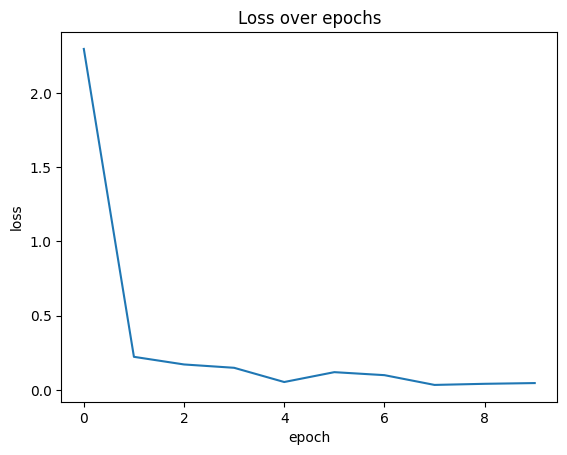

In [12]:
plt.plot(loss_arr)

plt.title('Loss over epochs')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

In [13]:
correct = 0

total = 0

with torch.no_grad():

    for image,label in test_loader :

        x = image.to(device)

        y = label.to(device)


        output = model.forward(x)
        _,output_index = torch.max(output,1)


        total += label.size(0)
        correct += (output_index == y).sum().float()


    print("Accuracy of Test Data : {}".format(100*correct/total))

Accuracy of Test Data : 98.828125


# 모델 저장하고 불러오기

In [14]:
path2model = './models/model.pt'

In [16]:
import os
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

# store model and weights into a file
torch.save(model, path2model)

# define model : weights are randomly initiated
_model = CNN()

# load the model from the local file
_model = torch.load(path2model)